<a href="https://colab.research.google.com/github/beomseokwee/pythonBigData/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D3%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
path = '/content/sample_data/Fish.csv'
fish = pd.read_csv(path)
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [ ]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length2','Length3','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input , train_target, test_target = train_test_split(fish_input,fish_target)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.8


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
kn.predict(test_scaled[:5])

array(['Pike', 'Perch', 'Perch', 'Pike', 'Bream'], dtype=object)

In [ ]:
print(test_target[:5])

['Pike' 'Perch' 'Roach' 'Pike' 'Bream']


In [ ]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]]


In [ ]:
print(test_scaled[3])
print(test_scaled[3:4]) # 이차원 배열 그대로 오게 된다??

[-0.31322195  0.86108575  0.7615168  -0.66525541 -0.29907899]
[[-0.31322195  0.86108575  0.7615168  -0.66525541 -0.29907899]]


In [ ]:
_, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Pike' 'Pike' 'Pike']]


In [ ]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))
# 시그모이드 함수 공식

In [ ]:
xs = [x for x in np.arange(-10,10,0.1)]
ys = [sigmoid(x) for x in xs]

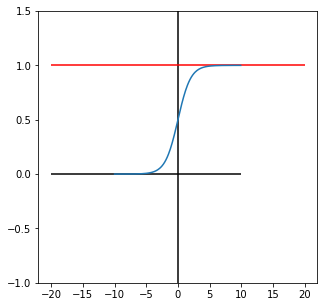

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(xs,ys)
plt.vlines(0,-2,2)
plt.ylim(-1,1.5)
plt.hlines(0,-20,10)
plt.hlines(1,-20,20,color='r')
plt.show()

In [ ]:
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]# or로 인해 bream이랑 smelt가 True 만 추출 할 수있게 설정 후 , scale(input)값에서 
#  bream 이랑 smelt의 scale값만 추출,target에선 bream smelt만 추출
bream_smelt_indexes2 = (test_target == 'Bream')|(test_target == 'Smelt')
test_bream_smelt = test_scaled[bream_smelt_indexes2]
test_target_bream_smelt = test_target[bream_smelt_indexes2] # 7종으로 있었던거를 이항분류로 위해서 두개로 바꿈

In [ ]:
train_bream_smelt
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Smelt', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt'], dtype=object)

In [ ]:
from sklearn.linear_model import LogisticRegression # 이진 분류
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)  # 불리언 인덱싱으로 분류된 (특성,종류)

LogisticRegression()

In [ ]:
lr.predict(test_bream_smelt)

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [ ]:
print(test_target_bream_smelt)

['Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt'
 'Bream' 'Bream']


In [ ]:
print(lr.classes_) # 원래 클레스에는 7개가 있었으나 2개로 불리언 인덱싱으로 인해 추출해냄

['Bream' 'Smelt']


In [ ]:
print(lr.coef_,lr.intercept_) # 로지스틱에 의해 만들어진 가중치와 편향

[[-0.44336788 -0.62193106 -0.71266187 -0.99427194 -0.75165268]] [-2.38705724]


In [ ]:
decisions = lr.decision_function(test_bream_smelt[:5])
print(decisions) # 선형회귀값에 의한 예측 값과 매우 유사하다, 로지스틱 회귀 모델이 학습한 학습 값

[-8.0903273  -3.30129631  3.82649172 -3.58944932 -6.21140013]


In [ ]:
for d in decisions:
  print("%0.2f"%sigmoid(d),end=' ') # sigmoid(로지스틱)함수에 의해 확률값이 바뀐 결과 [b,b,s,b,b] <<s만 확률값이 다르다.

0.00 0.04 0.98 0.03 0.00 

In [ ]:
from scipy.special import expit
print(expit(decisions))
a = expit(decisions)  # 시그모이드 내장함수
print(a)

for i in a:
  print('%0.2f'%i,end=' ')
  

  
  


[3.06395520e-04 3.55267449e-02 9.78678594e-01 2.68715151e-02
 2.00240855e-03]
[3.06395520e-04 3.55267449e-02 9.78678594e-01 2.68715151e-02
 2.00240855e-03]
0.00 0.04 0.98 0.03 0.00 

In [ ]:
res = lr.predict(test_bream_smelt[:5])
print(res) # 결론

['Bream' 'Bream' 'Smelt' 'Bream' 'Bream']


# 로지스틱 회귀를 이용한 다중분류 # 소프트 맥스??

In [ ]:
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8067226890756303
0.825


In [ ]:
lr = LogisticRegression(C=20,max_iter= 1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target)) # 학습 넣은것도 잘되고,
print(lr.score(test_scaled,test_target)) # 시험 넣은것도 잘된다.

0.9159663865546218
0.95


In [ ]:
print(lr.predict(test_scaled[:5]))

['Pike' 'Perch' 'Roach' 'Pike' 'Bream']


In [ ]:
proba = lr.predict_proba(test_scaled[:5]) # predict_proba로 각각의 확률을 나타냄
print(np.round(proba,decimals=3))

[[0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.007 0.861 0.    0.103 0.023 0.006]
 [0.    0.035 0.337 0.002 0.557 0.004 0.063]
 [0.    0.    0.006 0.993 0.001 0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_) # 가중치, 로지스틱 회귀를 7번 시행한다

[[-1.64407977 -0.92304384  2.90960774  7.91351494 -0.8127802 ]
 [ 0.55167207 -1.73160538 -3.42354742  6.21972442 -1.85287243]
 [ 3.96889775  6.39244349 -9.20258449 -6.64588008  4.37503924]
 [-0.29975496  3.58918867  3.75235847 -2.8620269  -1.71098001]
 [-3.13948277 -5.5059214   4.91373285 -0.98355295  2.7355168 ]
 [-1.62815459  0.75275017  0.95651677 -4.77434767 -4.54779653]
 [ 2.19090227 -2.57381171  0.09391608  1.13256825  1.81387313]]


In [ ]:
print(lr.intercept_) # 편향

[ 0.27790083  0.07574877  2.67128994 -0.24861271  1.48235031 -7.13658147
  2.87790432]


소프트 맥스는 다중분류를 하는데 확률을 가지고 사용 하는거로 생각?

In [ ]:
# 소프트맥스로 가중치와 편향을 계산 해주는것?
decision = lr.decision_function(test_scaled[:5]) # 각각은 선형회귀 함수의 값들이 나온것 
print(np.round(decision,decimals=2))

[[  0.62 -14.8   12.16  19.2   -9.19 -12.46   4.47]
 [ -8.21   0.72   5.51  -3.84   3.38   1.88   0.56]
 [ -3.92   0.54   2.8   -2.26   3.3   -1.58   1.12]
 [ -2.81  -7.78   3.04   8.21   1.3   -0.71  -1.25]
 [ 16.92   5.85  -4.    -0.1   -2.66 -24.53   8.52]]


In [ ]:
# sigmoid func로 할 수 있지만;
from scipy.special import softmax
proba = softmax(decision,axis=1)
print(np.round(proba,decimals=3)) 

[[0.    0.    0.001 0.999 0.    0.    0.   ]
 [0.    0.007 0.861 0.    0.103 0.023 0.006]
 [0.    0.035 0.337 0.002 0.557 0.004 0.063]
 [0.    0.    0.006 0.993 0.001 0.    0.   ]
 [1.    0.    0.    0.    0.    0.    0.   ]]


# 확률적 경사하강법 모델

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier()
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8907563025210085
0.9


In [ ]:
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.8151260504201681
0.8


In [ ]:
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.7563025210084033
0.725


In [ ]:
sc.fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.865546218487395
0.85


In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target)) # fit 이랑 partial_fit 차이 확인하기

0.8151260504201681
0.775


In [ ]:
sc = SGDClassifier(loss='log',random_state=1)
train_score=[]
test_score=[] # 머신러닝은 하나하나씩 하지만 딥러닝은 자동으로 값을 반환 해준다
classes = np.unique(train_target)

In [ ]:
for _ in range(0,100):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

<function matplotlib.pyplot.show>

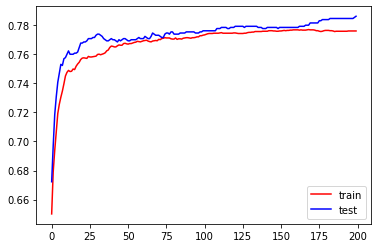

In [ ]:
plt.plot(train_score,label='train',color='r')
plt.plot(test_score,label='test',color='b')
plt.legend()
plt.show

In [ ]:
path = '/content/sample_data/wine2.csv'
wine = pd.read_csv(path)
wine.head()


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
wine['class'].unique()

array([0., 1.])

In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()

In [ ]:
target = wine['class'].to_numpy()
data.shape, target.shape

((6497, 3), (6497,))

In [ ]:
train_input, test_input, train_target, test_target = train_test_split(data,target,test_size = 0.2)
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
train_scaled = train_input
test_scaled = test_input # 변수명만 리스케일 한걸로 표현

In [ ]:
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7698672310948624
0.8061538461538461


In [ ]:
print(lr.coef_,lr.intercept_) # 각각의 가중치 , 편향

[[ 0.38095457  0.33922261 -3.92898133]] [8.54104307]


In [ ]:
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))
print(lr.coef_,lr.intercept_) # 평군이 10 , 5정도인데 스케일이 조절이 되면서의 차이, 그렇지만 점수차이는 크게 없다
# 특성공학 이용해서 더 훈련횟수를 더 늘리거나 줄여서 사용할때는 스케일링이 필요하지만 그런 작업이 없다면 스케일링을 해줄 필요가 없다??
# 지금의 상황을 보면 suger가 제일 큰 영향을 미치고 있다 가중치 가 높으니까

0.7789109101404657
0.7923076923076923
[[ 0.54083386  1.68562076 -0.68728951]] [1.78002298]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9978833942659227
0.8653846153846154


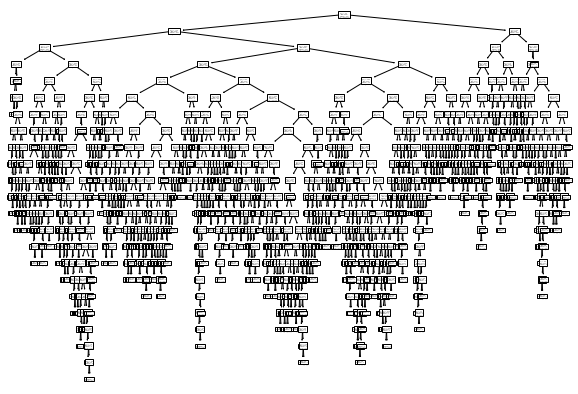

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

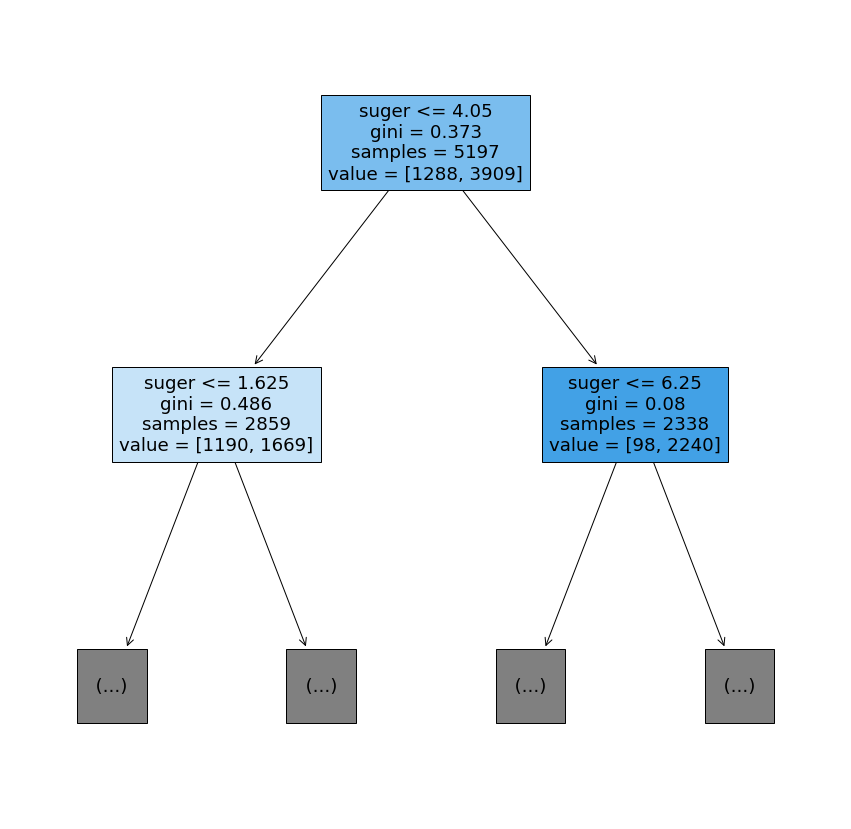

In [ ]:
# 트리중에 일부분만
plt.figure(figsize=(15,15))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','suger','pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.8491437367712141
0.8392307692307692


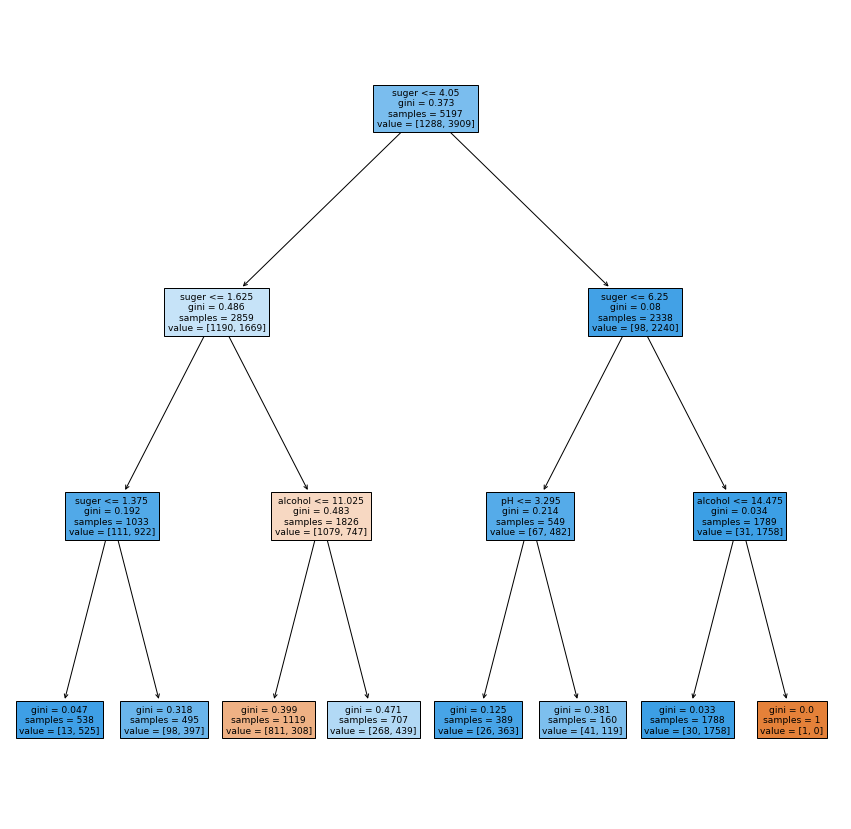

In [ ]:
plt.figure(figsize=(15,15))
plot_tree(dt,filled=True,feature_names=['alcohol','suger','pH'])
plt.show()
# 파란색이 진하면 진할수록 정확도가 높은것

In [ ]:
print(dt.feature_importances_) # 제일 중요한건 suger이다

[0.13067031 0.85925243 0.01007726]


In [ ]:
# 검증세트 , 훈련 세트, 평가세트 였는데 , 이중 훈련세트에서 훈련만 하는게 아니라 검증을 해나간다?
# 머신러닝에서는 아래처럼 직접 나누었지만 딥러닝에선 내부에서 이작업을 수행한다?
sub_input, val_input, sub_target, val_target= train_test_split(train_input,train_target)

In [ ]:
dt = DecisionTreeClassifier(max_depth=6)
dt.fit(sub_input,sub_target)
print(dt.score(sub_input,sub_target))
print(dt.score(val_input,val_target))
print(dt.score(test_input,test_target))

0.8814472671285605
0.8592307692307692
0.8607692307692307


In [ ]:
from sklearn.model_selection import GridSearchCV
# depth로 트리의 크기를 조절할 수도 있지만 불순도로도 트리의 크기를 조절 할 수있다.
params = {'min_impurity_decrease':[0.0001,0.0001,0.01,0.1,0.2]}
gs = GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1) # n_jobs는 cpu코어수를 지정하는것, -1은 사용할수 있는것 모두 사용하게 요청 하는것
gs.fit(train_input,train_target)
dt = gs.best_estimator_
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9630556090051953
0.8807692307692307


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.8676155  0.87011698 0.8470258  0.7521648  0.7521648 ]


In [ ]:
params = {
    'min_impurity_decrease':[0.0001,0.0001,0.01,0.1,0.2],
    'max_depth':range(5,20),
    'min_samples_split':range(2,100,10)
    }

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1) # n_jobs는 cpu코어수를 지정하는것, -1은 사용할수 있는것 모두 사용하게 요청 하는것
gs.fit(train_input,train_target)
dt = gs.best_estimator_
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))# 600회 정도를 gridsearch가 알아서 한다

0.9045603232634212
0.8584615384615385


# 2. 하이퍼파라미터(Hyperparameter)
머신러닝에서 하이퍼파라미터는 최적의 훈련 모델을 구현하기 위해 모델에 설정하는 변수로 학습률(Learning Rate), 에포크 수(훈련 반복 횟수), 가중치 초기화 등을 결정할 수 있습니다. 또한 하이퍼파라미터 튜닝 기법을 적용하여 훈련 모델의 최적값들을 찾을 수 있습니다.


In [ ]:
print('최적 하이퍼 파라미터',gs.best_params_)

최적 하이퍼 파라미터 {'max_depth': 8, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


- column과 row가 정해져 있는걸 정형 데이터,
- 들쑥날쑥하게(json,xml,html)되있는 데이터들을 반정형 데이터
- (Text문서,영상, 이미지 등 )이런 데이터들은 비정형 데이터 라고 한다.


# 앙상블

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_validate(rf,train_input,train_target,return_train_score=True)
print(scores)

{'fit_time': array([0.69344592, 0.59959841, 0.58833933, 0.56228018, 0.59637642]), 'score_time': array([0.07711673, 0.06599712, 0.05053091, 0.04619741, 0.04828167]), 'test_score': array([0.89230769, 0.89807692, 0.90086622, 0.88642926, 0.88450433]), 'train_score': array([0.99903777, 0.99783498, 0.9983165 , 0.9978355 , 0.9978355 ])}


In [ ]:
print(np.mean(scores['train_score']),np.mean(scores['test_score'])) # 평균적으로 봤을땐 안정적인 점수, best라고는 생각 x?

0.9981720477510712 0.8924368845783668


In [ ]:
rf.fit(train_input,train_target)
print(rf.feature_importances_)

[0.22446978 0.50727582 0.2682544 ]


In [ ]:
print(rf.score(train_input,train_target))
print(rf.score(test_input,test_target))

0.9978833942659227
0.8938461538461538
